In [2]:
import pandas as pd

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [10]:
df['flower_name']  =df.target.apply(lambda x : iris.target_names[x])

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [14]:
from matplotlib import pyplot as plt

In [15]:
%matplotlib inline

In [16]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [17]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


Text(0, 0.5, 'sepal width (cm)')

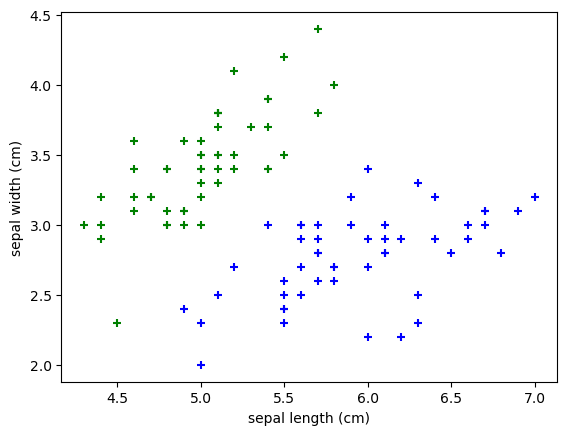

In [20]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker = '+')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'petal length (cm)')

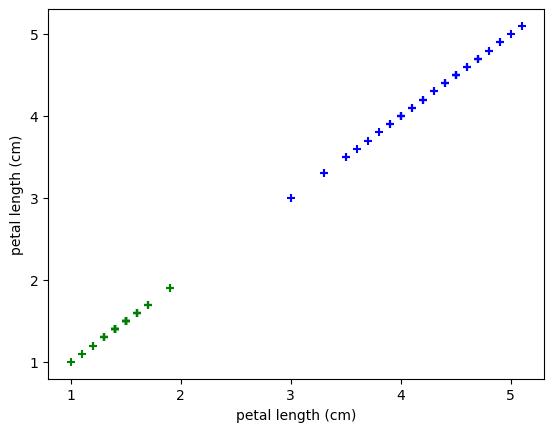

In [22]:
plt.scatter(df0['petal length (cm)'], df0['petal length (cm)'], color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal length (cm)'], color = 'blue', marker = '+')
plt.xlabel('petal length (cm)')
plt.ylabel('petal length (cm)')

In [25]:
from sklearn.model_selection import train_test_split
x = df.drop(['target', 'flower_name'] , axis = 'columns')
x.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
y = df.target

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.3)


In [57]:

len(x_test)

45

In [62]:
from sklearn.svm import SVC
model = SVC()


In [63]:
model.fit(x_train, y_train)

SVC()

In [64]:
model.score(x_train , y_train)

0.9714285714285714

In [65]:
model.predict([[4.8 , 3.0 , 1.5 , 0.3]])

D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [68]:
#regularization
model_c = SVC(C =  10)
model_c.fit(x_train, y_train)
model_c.score(x_train , y_train)

0.9809523809523809

In [70]:
#gamma
model_g = SVC(gamma=10)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)

1.0

In [74]:
#kernel
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(x_train, y_train)

model_linear_kernal.score(x_test, y_test)

1.0

In [77]:
from sklearn.datasets import load_digits
digits = load_digits()

In [78]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [79]:
df = pd.DataFrame(digits.data, digits.target)

In [80]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [81]:
df['target'] = digits.target

In [82]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(df.drop('target', axis = 'columns'), df.target, test_size = 0.3) 

In [83]:
from sklearn.svm import SVC
rbf_model = SVC(kernel = 'rbf')

In [89]:
#rbf KERNEL
rbf_model.fit(x_train , y_train)
rbf_model.score(x_test, y_test)

0.987037037037037

In [90]:
#LINEAR KERNEL
linear_model = SVC(kernel = 'linear')
linear_model.fit(x_train , y_train)
linear_model.score(x_test, y_test)

0.9833333333333333

In [91]:
#gamma
model_g = SVC(gamma=10)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)

0.08148148148148149

In [92]:
model_c = SVC(C =  10)
model_c.fit(x_train, y_train)
model_c.score(x_train , y_train)

1.0